# Численное решение обыкновенных дифференциальных уравнений

## Уравнения Лотки-Вольтерры

### TODO:
- [х] Найти стационарные решения уравнений Лотки-Вольтерры, сравнить с численным результатом;
- [ ] Получить выражение для периода колебаний в линеаризованной задаче, сравнить с численным результатом;
- [ ] Провеcти моделирование для случая 1: $x_0 = 0, y_0 \neq 0$, для случая 2: $x_0 \neq 0, y_0 = 0$ ;
- [ ] Построить семейство фазовых портретов для различных значений начальных условий.

Рассмотрим систему диференциальных уравнений, описывающих изменение со временем численность популяций кроликов (жертв) - $x(t)$ и лис (хищников) - $y(t)$. Математическая модель, описывающая динамику численности видов, была предложена [Лоткой и Вольтеррой](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D0%9B%D0%BE%D1%82%D0%BA%D0%B8_%E2%80%94_%D0%92%D0%BE%D0%BB%D1%8C%D1%82%D0%B5%D1%80%D1%80%D1%8B) и основывается на следующем соображении. Чем больше кроликов проживает на данной территории, тем больший прирост получит их популяция, с другой стороны, при встрече кролика с хищником популяция кроликов убывает, оба этих факта отражены в первом уравнении системы. Количество лис, наоборот, прирастает пропорцинально произведению численности кроликов и лис. Если кроликов совсем не останется на рассматриваемой территории, то численность лис будет естественным образом убывать, при этом скорость смерности пропорциональна числу лис. $$ \frac{dx}{dt} = \alpha x - \beta x y, \\ \frac{dy}{dt} = \gamma x y - \delta y, $$ где $\alpha$, $\beta$, $\gamma$ и $\delta$ - эмпирические константы.    

Рассмотрим скрипт, которых решает рассматриваемую систему уравнений с помощью метода [Рунге-Кутты 4-го порядка точности](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%A0%D1%83%D0%BD%D0%B3%D0%B5_%E2%80%94_%D0%9A%D1%83%D1%82%D1%82%D1%8B) для значений постоянных $\alpha = 1$, $\beta = \gamma = 0.5$ и $\delta = 2$ при начальных условиях $x(0) = y(0) = 2$.
В первую очередь импортируем необходимые функции библиотек numpy и pylab.

In [59]:
from numpy import linspace, array
from pylab import plot, xlabel, ylabel, legend, show

Определим функцию-вектор правых частей системы диф. уравнений, на вход она получает вектор неизвестных $r$, время и константы. Нулевой элемент вектора $r$ является численностью жертв, а первый элемент - число хищников.

In [60]:
def f(r, t, alpha, beta, gamma, delta):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return array([fx, fy], float)

Задаем эмпирические константы, шаг по времени, начальные условия $x_0$ и $y_0$. Определяем вектор вектор неизвестных $r$.

In [61]:
a = 0.
b = 40.
N = 1000
h = (b-a)/N
alpha = 1.
beta = 0.5
gamma = 0.5
delta = 2.
x0 = 2.
y0 = 2.
time = linspace(a,b,N+1)
xpoints = []
ypoints = []
r = array([x0,y0], float)

Основной цикл по времени позволяет вычислить численость популяций в последовательные моменты времени согласно методу Рунге-Кутты 4-го порядка точности. 

In [62]:
for t in time:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r, t, alpha, beta, gamma, delta)
    k2 = h*f(r+0.5*k1, t+0.5*k1, alpha, beta, gamma, delta)
    k3 = h*f(r+0.5*k2, t+0.5*k2, alpha, beta, gamma, delta)
    k4 = h*f(r+k3, t+h, alpha, beta, gamma, delta)
    r += (k1+k2+k3+k4)/6.

Для построения графика функции численности хищников и жертв от времени в окне браузера требуется вызвать "магическую команду" %matplotlib inline.

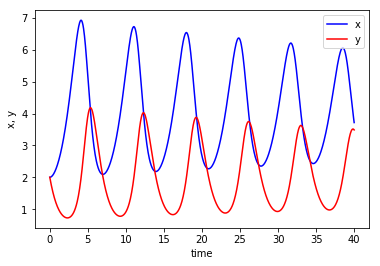

In [63]:
%matplotlib inline
plot(time, xpoints, 'b', label = 'x')
plot(time, ypoints, 'r', label = 'y')
xlabel('time')
ylabel('x, y')
legend()
show()

Результатом численного решения задачи о динамике популяций хищников и жертв, обитающих на общей территории, могут быть нелинейные колебания (для заданных значений констант наблюдается именно этот режим). Объяснить такое поведением можно тем, что с ростом числа кроликов (синяя линия на рисунке) с некоторым запаздыванием возникает рост числа лис (красная линия на рисунке). По мере роста числа хищников прирост кроликов прекращается, их популяция начинает убывать. Убыль числа кроликов приводит к сокращению числа лис, т.к. последним становится нечем питаться. Как только число хищников спадает, прирост кроликов возрастает и колебание численности повторяется снова.

Можно показать, что период колебаний числености хищников и жертв вблизи стационарных значений определяется формулой $T = 2 \pi / \sqrt{\alpha \delta}$. Получите это выражение, определив стационарные значения численностей кроликов и лис, а затем получите уравнение гармонических колебаний для малых отклонений от стационарных значений.

Воспользуемся стандартной реализацией метода решения дифференциальных уравнений odeint из библиотеки scipy.integrate для уравнений Лотки-Вольтерра.

In [64]:
from scipy.integrate import odeint
r0 = array([x0,y0], float)
r = odeint(f, r0, time, args = (alpha, beta, gamma, delta))

В качестве аргументов функция odeint получает функцию-вектор правых частей диф.уравнений f, начальные условия r0, массив с моментами времени, для которых требуется найти неизвестные значения,  time, а также кортеж параметров args, который нужно передать в функцию f, содержащий набор эмпирических констант.

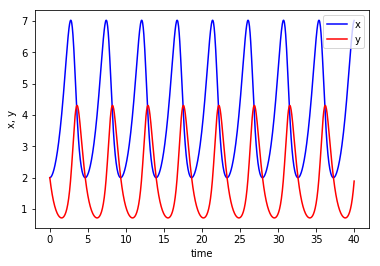

In [65]:
plot(time, r[:,0], 'b', label = 'x')
plot(time,  r[:,1], 'r', label = 'y')
xlabel('time')
ylabel('x, y')
legend()
show()

Полученный сценарий не является единственным возможным. Если начальная численность одной из популяций равна нулю, то периодический режим не реализуется. Либо и хищники, и жертвы погибают, либо погибают только хищники. Проведите моделирование таких ситуаций для случая 1: $x_0 = 0, y_0 \neq 0$, для случая 2: $x_0 \neq 0, y_0 = 0$.

In [73]:
x0 = 
y0 = 
time = linspace(a,b,N+1)
r0 = array([x0,y0], float)
r = odeint(f, r0, time, args = (alpha, beta, gamma, delta))
plot(time, r[:,0], 'b', label = 'x')
plot(time, r[:,1], 'r', label = 'y')
xlabel('time')
ylabel('x, y')
legend()
show()

SyntaxError: invalid syntax (<ipython-input-73-e9412fd00cc7>, line 1)

[Фазовый портрет](https://ru.wikipedia.org/wiki/%D0%A4%D0%B0%D0%B7%D0%BE%D0%B2%D0%BE%D0%B5_%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D1%81%D1%82%D0%B2%D0%BE) динамической системы представляет собой явную зависимость $y(x)$, после исключения параметра времени $t$. Результат численного моделирования дает следующую зависимость:

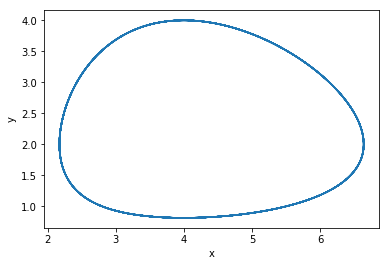

In [75]:
x0 = 4.
y0 = 4.
time = linspace(a,b,N+1)
r0 = array([x0,y0], float)
r = odeint(f, r0, time, args = (alpha, beta, gamma, delta))
plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

Постройте семейство фазовых портретов для различных значений начальных условий $(x_0, y_0) = (4,1), (4,2), ..., (4,10)$.

In [77]:
x0 = 4.
y0_vec = linspace()
time = linspace(a,b,N+1)
for y0 in y0_vec:
    r0 = array([x0,y0], float)
    r = odeint(f, r0, time, args = (alpha, beta, gamma, delta))
    plot(r[:,0], r[:,1])
xlabel('x')
ylabel('y')
show()

TypeError: linspace() missing 2 required positional arguments: 'start' and 'stop'

Уравнения Лотки-Вольтерры допускают интегрирование после разделения переменных: $$ -\frac{ \gamma x - \delta }{x}\frac{dx}{dt} + \frac{\alpha - \beta y}{y}\frac{dy}{dt} = 0,$$
$$ \frac{d}{dt} ( \delta \log x - \gamma x + \alpha \log y - \beta y ) = 0. $$
Введем функцию $H(x,y) = \delta \log x - \gamma x + \alpha \log y - \beta y$, которая остается постоянной на решений уравнений Лотки-Вольтерры. При ненулевых начальных условиях $𝑥_0 \neq 0, 𝑦_0 \neq 0$ функция $H(x,y) = H(x_0,y_0)$ будет принимать конечные значения, фазовая траектория будет замкнутой кривой. 
Если одно из начальных значений обращается в ноль, то фазовая траектория перестает быть замкнутой кривой - предельным циклом.